In [135]:
import pandas as pd
import scipy 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
from scipy.io import arff
data = arff.loadarff('datafruits.arff')
df = pd.DataFrame(data[0])

In [12]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163.0,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428.0,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-5.071421e+10,-3.992237e+10,58.7255,54.9554,47.8400,b'BERHI'
1,338136.0,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014.0,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-3.746260e+10,-3.147779e+10,50.0259,52.8168,47.8315,b'BERHI'
2,526843.0,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876.0,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-7.473822e+10,-6.031121e+10,65.4772,59.2860,51.9378,b'BERHI'
3,416063.0,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255.0,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-3.206093e+10,-2.957501e+10,43.3900,44.1259,41.1882,b'BERHI'
4,347562.0,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797.0,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-3.598004e+10,-2.559328e+10,52.7743,50.9080,42.6666,b'BERHI'


In [13]:
df['Class']

0      b'BERHI'
1      b'BERHI'
2      b'BERHI'
3      b'BERHI'
4      b'BERHI'
         ...   
893    b'SOGAY'
894    b'SOGAY'
895    b'SOGAY'
896    b'SOGAY'
897    b'SOGAY'
Name: Class, Length: 898, dtype: object

In [15]:
df['Class'].unique()

array([b'BERHI', b'DEGLET', b'DOKOL', b'IRAQI', b'ROTANA', b'SAFAVI',
       b'SOGAY'], dtype=object)

In [21]:
for Class in df:
    df[Class] = df[Class].apply(lambda x: x.decode() if isinstance(x, bytes) else x)

In [22]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163.0,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428.0,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-5.071421e+10,-3.992237e+10,58.7255,54.9554,47.8400,BERHI
1,338136.0,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014.0,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-3.746260e+10,-3.147779e+10,50.0259,52.8168,47.8315,BERHI
2,526843.0,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876.0,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-7.473822e+10,-6.031121e+10,65.4772,59.2860,51.9378,BERHI
3,416063.0,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255.0,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-3.206093e+10,-2.957501e+10,43.3900,44.1259,41.1882,BERHI
4,347562.0,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797.0,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-3.598004e+10,-2.559328e+10,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403.0,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028.0,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-1.916888e+10,-1.847339e+10,49.0869,43.0422,42.4153,SOGAY
894,365924.0,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566.0,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-2.194537e+10,-1.927791e+10,46.8086,39.1046,36.5502,SOGAY
895,254330.0,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255.0,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-1.959492e+10,-1.759215e+10,44.1325,40.7986,40.9769,SOGAY
896,238955.0,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795.0,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-2.129982e+10,-1.980998e+10,51.2267,45.7162,45.6260,SOGAY


In [26]:
!pip install openpyxl #needed for read_excel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:0101


In [27]:
df_excel = pd.read_excel('datafruits.xlsx')

In [29]:
df_excel

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    float64
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    float64
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

**TO IMPORT FROM JSON**

In [31]:
#https://www.kaggle.com/datasets/rtatman/iris-dataset-json-version - link for iris dataset
df_json = pd.read_json('iris.json')

In [32]:
df_json

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
df_excel.sample(5) #to show 5 random rows

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
724,367307,2557.6340,930.2054,506.4240,0.8388,683.8639,0.9774,375786,0.7573,1.8368,...,11.1060,11.4399,4.4714,-8204538880,-10223009792,-14246360064,23.8525,26.4504,31.9898,SAFAVI
518,385907,2330.0549,824.3710,600.6796,0.6849,700.9651,0.9881,390557,0.7334,1.3724,...,2.1361,2.2385,2.3273,-42107854848,-40396414976,-38690463744,51.4491,50.8067,49.6991,ROTANA
378,349532,2150.8059,713.5856,628.6521,0.4732,667.1116,0.9900,353065,0.7606,1.1351,...,4.3518,7.7933,6.5822,-13092105216,-18793998336,-18097070080,31.3225,37.3714,36.2739,IRAQI
561,359037,2249.9441,783.8896,614.4819,0.6209,676.1214,0.9604,373845,0.7648,1.2757,...,3.4133,3.0270,2.4897,-74670252032,-70009659392,-53186310144,70.6414,68.9909,60.6900,ROTANA


In [35]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [36]:
df_excel.isnull().sum() #to check the total number of null values

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [37]:
df_json.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

In [38]:
df_excel.describe() #to check for the statistical values of the dataset

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [40]:
#to check for any duplicate values in the dataset
df_excel.duplicated().sum()

0

In [41]:
#to check for correlation between columns
df_excel.corr()

ValueError: could not convert string to float: 'BERHI'

**PLOTS FOR THE DATASET - CATEGORICAL** 

<Axes: xlabel='count', ylabel='Class'>

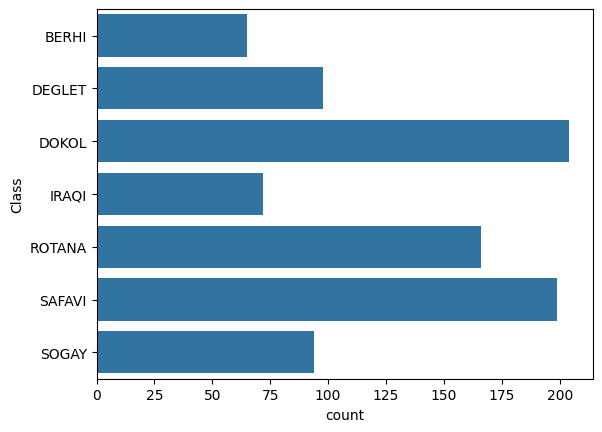

In [56]:
sns.countplot(df_excel['Class'])
#df_excel['Class'].value_counts().plot()

<Axes: ylabel='count'>

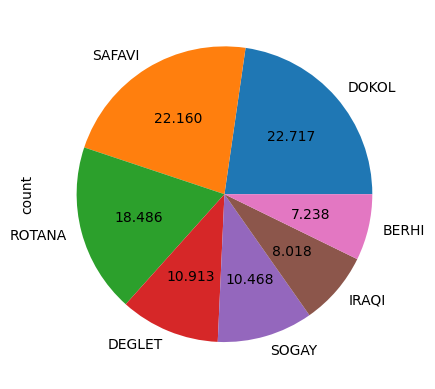

In [58]:
#To show in matplotlib piechart
df_excel['Class'].value_counts().plot(kind = 'pie', autopct='%.3f')

**PLOTS FOR THE DATASET - NUMERICAL DATASET**

In [60]:
df = df_excel

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

/tmp/ipykernel_19663/876221936.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AREA'])


<Axes: xlabel='AREA', ylabel='Density'>

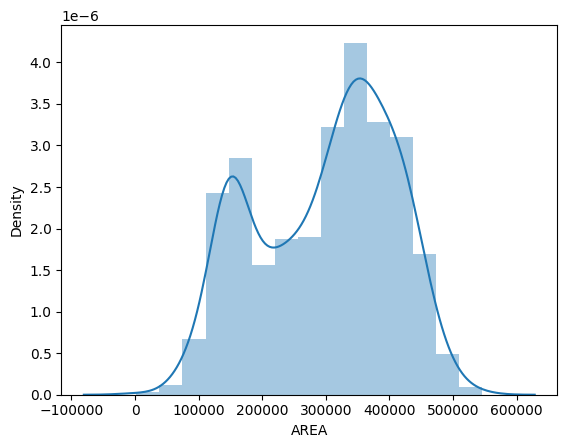

In [80]:
#plt.hist(df['AREA'])
#sns.displot(df['AREA'])
#sns.distplot(df['AREA']) #to show the distribution of the data, y axis == probability density function, x axis == area


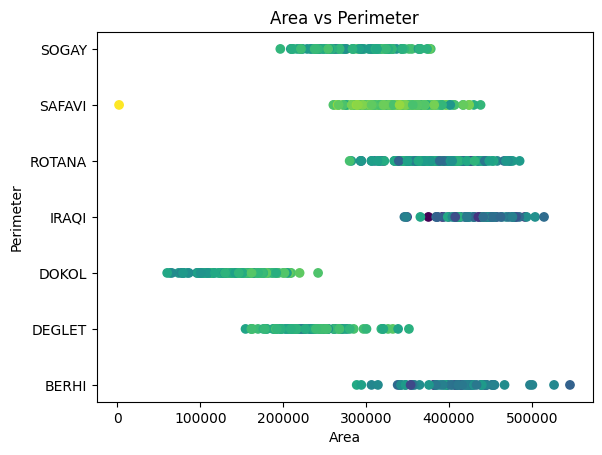

In [93]:
#to plot between two features
plt.scatter(df['AREA'], df['Class'], c=df['ECCENTRICITY'])
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Area vs Perimeter')
plt.show()

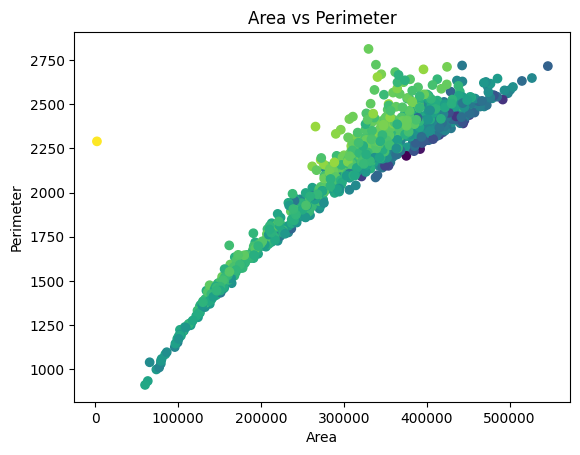

In [94]:
plt.scatter(df['AREA'], df['PERIMETER'], c=df['ECCENTRICITY'])
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Area vs Perimeter')
plt.show()

/tmp/ipykernel_19663/452760028.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 'SAFAVI']['AREA'], color = 'r', label = 'AREA VS SAFAVI', hist=False)
/tmp/ipykernel_19663/452760028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 'DOKOL

<Axes: xlabel='AREA', ylabel='Density'>

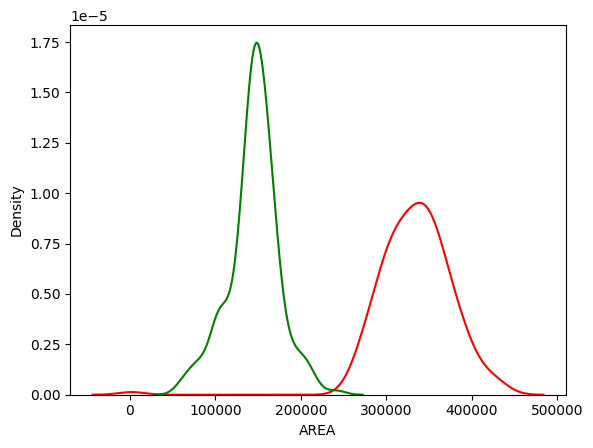

In [100]:
#comparison of area and two date fruits to class
sns.distplot(df[df['Class'] == 'SAFAVI']['AREA'], color = 'r', label = 'AREA VS SAFAVI', hist=False)
sns.distplot(df[df['Class'] == 'DOKOL']['AREA'], color = 'g', label = 'AREA VS DOKOL', hist=False)

In [121]:
!pip install visions==0.7.4
!pip install ydata-profiling
!pip install pydantic-settings #or else will cause error when using pandas profiling 

  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [125]:
#will take time to create and load
import ydata_profiling as yp
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/rutpatel/Documents/deeplearning/dl/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'BERHI'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**DATA PREPROCESSING**

In [218]:
X = df.drop(['Class'], axis=1) 
X

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [219]:
#why drop for axis=1
#axis=1 means that we are referring to a column, not a row
#axis=0 means that we are referring to a row, not a column
print(df.shape)
print(df['Class'].shape)

(898, 35)
(898,)


In [220]:
y = df['Class']
print(y.shape)
y

(898,)


0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

In [221]:
#splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [222]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((718, 34), (180, 34), (718,), (180,))

In [223]:
#to check the distribution of the data
print(y_train.value_counts())
print(y_test.value_counts())

Class
DOKOL     163
SAFAVI    156
ROTANA    128
DEGLET     80
SOGAY      80
IRAQI      62
BERHI      49
Name: count, dtype: int64
Class
SAFAVI    43
DOKOL     41
ROTANA    38
DEGLET    18
BERHI     16
SOGAY     14
IRAQI     10
Name: count, dtype: int64


In [224]:
#scaling the data using z-score standardization
#can use minmaxscaler using from sklearn.preprocessing import MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [264]:
X_train_scaled

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.381697,0.340026,0.292946,0.441420,-0.140980,0.439987,0.425572,0.359017,0.296769,-0.041610,...,-0.775134,-0.662273,-0.738984,-0.617941,-0.178755,0.107019,-0.758064,-0.080847,-0.399987,0.455800
1,-1.321114,-1.363586,-1.315576,-1.205810,0.377029,-1.319437,0.431426,-1.337060,0.018692,-0.035650,...,-1.210698,-0.159063,-0.644162,-0.584644,-0.025361,-0.146375,0.292461,1.267388,1.530855,1.186154
2,-1.494722,-1.633388,-1.655931,-1.323414,0.039538,-1.548280,0.595318,-1.513484,-0.625180,-0.039732,...,-0.221082,-0.612544,-0.861705,-0.649146,0.176403,0.079991,0.516562,1.213748,1.450490,1.036428
3,-0.557305,-0.153991,0.067479,-0.236859,0.565395,-0.446108,-6.329159,-0.284263,-0.050361,-0.032979,...,-0.140043,-0.621527,-0.809449,-0.472845,-0.465423,-0.206853,0.052284,0.848098,0.561979,0.445623
4,0.468067,0.788963,1.380797,-0.235684,1.488168,0.514395,-0.019280,0.469981,-0.279915,-0.012693,...,0.952326,-0.321338,1.332819,0.783119,0.936700,1.040409,1.166391,-1.246358,-1.386635,-1.851464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.733473,0.862686,1.325680,0.126882,1.159647,0.737047,0.185586,0.723959,0.586045,-0.021782,...,0.843750,0.545484,1.680191,0.507158,1.052997,0.961341,0.801892,-1.460583,-1.386002,-1.362810
714,0.269782,0.497576,0.961142,-0.210494,1.241497,0.342042,-0.739238,0.309792,-0.057827,-0.019768,...,0.345874,1.186911,0.671988,-0.127079,1.165369,1.077067,1.037220,-1.678001,-1.476238,-1.577333
715,-0.784641,-0.764563,-0.730491,-0.633029,0.200995,-0.687681,0.443132,-0.803172,0.800669,-0.037885,...,-0.822499,-0.735520,-0.846824,-0.597618,-0.046619,-0.018029,0.164266,0.596693,0.532657,0.529628
716,-1.343376,-1.469469,-1.562825,-1.058167,-0.399984,-1.347988,0.525079,-1.361465,-0.322840,-0.044016,...,-0.223442,-0.655981,-0.691227,-0.701650,0.884811,1.020506,0.988008,-0.201981,-0.413987,-0.280303


In [265]:
X_test_scaled

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,-0.414707,-0.231233,-0.067663,-0.505729,0.781793,-0.300861,0.009987,-0.417206,0.237048,-0.029469,...,-0.634458,-0.734712,-0.828429,-0.767548,-0.689049,-0.724347,-0.560128,0.912811,0.920097,0.971555
1,0.574069,1.242776,1.261362,0.000466,1.232527,0.604375,-1.154824,0.644209,-2.478409,-0.020009,...,-0.072380,1.272204,1.408102,0.249519,1.065658,0.911262,0.578797,-1.412899,-1.292018,-0.991822
2,-1.027160,-1.037450,-1.043816,-0.837134,0.098963,-0.961135,0.542639,-1.047576,-0.722227,-0.039075,...,-0.825331,-0.626978,-0.695939,-0.763549,0.348039,0.561249,0.195458,0.394361,0.134342,0.769771
3,0.466202,0.799408,1.405356,-0.208946,1.479198,0.512798,-0.639732,0.503777,-2.278716,-0.012980,...,0.927307,0.056742,2.452855,0.558081,1.214919,1.108675,1.041983,-1.675969,-1.536347,-1.617481
4,0.190089,0.379825,0.610006,0.010733,0.767217,0.271197,-1.822103,0.287574,-1.250388,-0.029730,...,0.771524,1.499752,0.953901,-0.008119,1.024185,0.912433,0.789394,-1.350086,-1.136085,-1.103050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.350859,1.617157,0.690815,1.540238,-1.406849,1.224436,-1.178237,1.441438,-0.194066,-0.050995,...,-0.653813,-0.660658,-0.778436,-0.598456,-1.888617,-1.926315,-1.508384,0.695071,0.645857,0.419883
176,0.580709,0.754224,0.607447,0.526977,0.122509,0.609963,-0.505106,0.611754,0.386351,-0.038799,...,-0.927456,-0.435869,-0.438278,-0.032721,-1.344205,-1.189537,-0.981428,0.835083,0.674015,0.566785
177,-0.595244,-0.315629,-0.420278,-0.019383,-0.430257,-0.485532,-5.334095,-0.373900,-0.533731,-0.044272,...,0.411964,-0.765364,-0.807958,-0.594735,-0.037002,-0.012202,0.197596,0.387938,0.384288,0.240922
178,1.407246,1.138594,1.087736,1.183402,-0.213860,1.267072,0.489959,1.375904,1.117938,-0.042318,...,0.497408,-0.251892,-0.309567,-0.085271,-1.349471,-1.300080,-1.495964,0.461149,0.356116,0.406165


In [227]:
#since after scaling, the data is converted into numpy array, we need to convert it back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)   
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [228]:
X_train_scaled

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.381697,0.340026,0.292946,0.441420,-0.140980,0.439987,0.425572,0.359017,0.296769,-0.041610,...,-0.775134,-0.662273,-0.738984,-0.617941,-0.178755,0.107019,-0.758064,-0.080847,-0.399987,0.455800
1,-1.321114,-1.363586,-1.315576,-1.205810,0.377029,-1.319437,0.431426,-1.337060,0.018692,-0.035650,...,-1.210698,-0.159063,-0.644162,-0.584644,-0.025361,-0.146375,0.292461,1.267388,1.530855,1.186154
2,-1.494722,-1.633388,-1.655931,-1.323414,0.039538,-1.548280,0.595318,-1.513484,-0.625180,-0.039732,...,-0.221082,-0.612544,-0.861705,-0.649146,0.176403,0.079991,0.516562,1.213748,1.450490,1.036428
3,-0.557305,-0.153991,0.067479,-0.236859,0.565395,-0.446108,-6.329159,-0.284263,-0.050361,-0.032979,...,-0.140043,-0.621527,-0.809449,-0.472845,-0.465423,-0.206853,0.052284,0.848098,0.561979,0.445623
4,0.468067,0.788963,1.380797,-0.235684,1.488168,0.514395,-0.019280,0.469981,-0.279915,-0.012693,...,0.952326,-0.321338,1.332819,0.783119,0.936700,1.040409,1.166391,-1.246358,-1.386635,-1.851464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.733473,0.862686,1.325680,0.126882,1.159647,0.737047,0.185586,0.723959,0.586045,-0.021782,...,0.843750,0.545484,1.680191,0.507158,1.052997,0.961341,0.801892,-1.460583,-1.386002,-1.362810
714,0.269782,0.497576,0.961142,-0.210494,1.241497,0.342042,-0.739238,0.309792,-0.057827,-0.019768,...,0.345874,1.186911,0.671988,-0.127079,1.165369,1.077067,1.037220,-1.678001,-1.476238,-1.577333
715,-0.784641,-0.764563,-0.730491,-0.633029,0.200995,-0.687681,0.443132,-0.803172,0.800669,-0.037885,...,-0.822499,-0.735520,-0.846824,-0.597618,-0.046619,-0.018029,0.164266,0.596693,0.532657,0.529628
716,-1.343376,-1.469469,-1.562825,-1.058167,-0.399984,-1.347988,0.525079,-1.361465,-0.322840,-0.044016,...,-0.223442,-0.655981,-0.691227,-0.701650,0.884811,1.020506,0.988008,-0.201981,-0.413987,-0.280303


In [229]:
X_test_scaled

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,-0.414707,-0.231233,-0.067663,-0.505729,0.781793,-0.300861,0.009987,-0.417206,0.237048,-0.029469,...,-0.634458,-0.734712,-0.828429,-0.767548,-0.689049,-0.724347,-0.560128,0.912811,0.920097,0.971555
1,0.574069,1.242776,1.261362,0.000466,1.232527,0.604375,-1.154824,0.644209,-2.478409,-0.020009,...,-0.072380,1.272204,1.408102,0.249519,1.065658,0.911262,0.578797,-1.412899,-1.292018,-0.991822
2,-1.027160,-1.037450,-1.043816,-0.837134,0.098963,-0.961135,0.542639,-1.047576,-0.722227,-0.039075,...,-0.825331,-0.626978,-0.695939,-0.763549,0.348039,0.561249,0.195458,0.394361,0.134342,0.769771
3,0.466202,0.799408,1.405356,-0.208946,1.479198,0.512798,-0.639732,0.503777,-2.278716,-0.012980,...,0.927307,0.056742,2.452855,0.558081,1.214919,1.108675,1.041983,-1.675969,-1.536347,-1.617481
4,0.190089,0.379825,0.610006,0.010733,0.767217,0.271197,-1.822103,0.287574,-1.250388,-0.029730,...,0.771524,1.499752,0.953901,-0.008119,1.024185,0.912433,0.789394,-1.350086,-1.136085,-1.103050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.350859,1.617157,0.690815,1.540238,-1.406849,1.224436,-1.178237,1.441438,-0.194066,-0.050995,...,-0.653813,-0.660658,-0.778436,-0.598456,-1.888617,-1.926315,-1.508384,0.695071,0.645857,0.419883
176,0.580709,0.754224,0.607447,0.526977,0.122509,0.609963,-0.505106,0.611754,0.386351,-0.038799,...,-0.927456,-0.435869,-0.438278,-0.032721,-1.344205,-1.189537,-0.981428,0.835083,0.674015,0.566785
177,-0.595244,-0.315629,-0.420278,-0.019383,-0.430257,-0.485532,-5.334095,-0.373900,-0.533731,-0.044272,...,0.411964,-0.765364,-0.807958,-0.594735,-0.037002,-0.012202,0.197596,0.387938,0.384288,0.240922
178,1.407246,1.138594,1.087736,1.183402,-0.213860,1.267072,0.489959,1.375904,1.117938,-0.042318,...,0.497408,-0.251892,-0.309567,-0.085271,-1.349471,-1.300080,-1.495964,0.461149,0.356116,0.406165


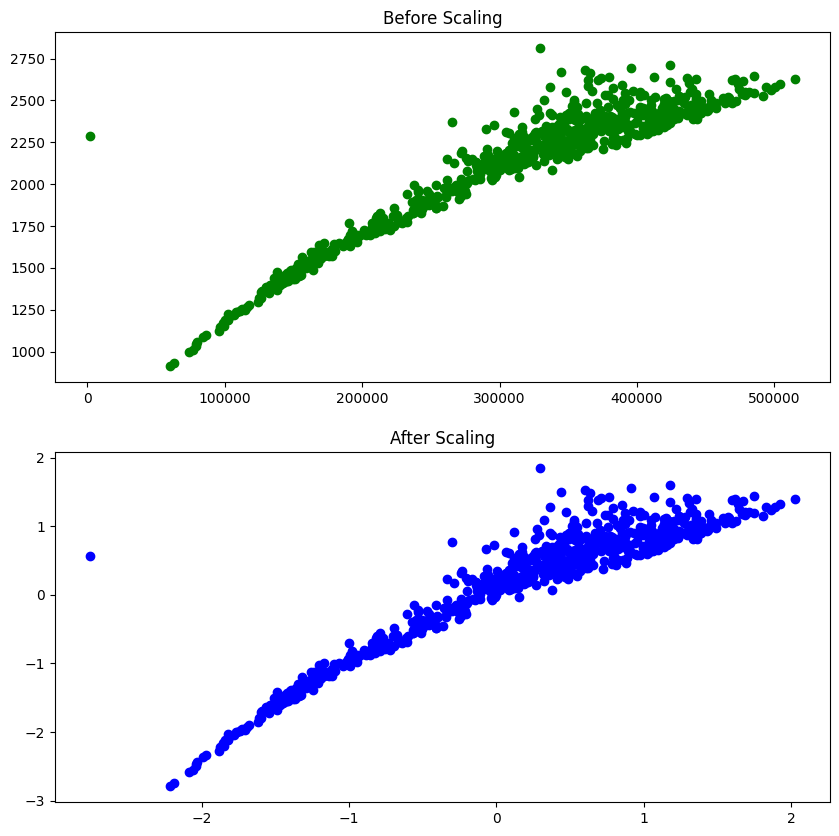

In [230]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_train['AREA'], X_train['PERIMETER'], color='green')
plt.title("Before Scaling")
plt.subplot(2, 1, 2)
plt.scatter(X_train_scaled['AREA'], X_train_scaled['PERIMETER'], color='blue')
plt.title("After Scaling")
plt.show()


In [231]:
from sklearn.preprocessing import LabelEncoder
label_y = LabelEncoder()
y_train_encoded = label_y.fit_transform(y_train)
y_test_encoded = label_y.fit_transform(y_test)

In [233]:
y_train_encoded

array([1, 2, 2, 6, 5, 4, 5, 3, 6, 3, 2, 1, 2, 5, 4, 5, 2, 2, 6, 2, 5, 5,
       2, 2, 0, 2, 4, 4, 4, 5, 4, 5, 1, 6, 2, 5, 1, 5, 1, 3, 5, 0, 5, 4,
       3, 2, 6, 5, 2, 6, 4, 4, 0, 0, 4, 3, 5, 0, 2, 2, 1, 3, 5, 1, 4, 6,
       1, 3, 0, 4, 6, 5, 1, 1, 3, 1, 3, 6, 5, 4, 4, 2, 5, 2, 2, 1, 5, 5,
       5, 4, 6, 4, 2, 4, 2, 4, 1, 1, 6, 1, 6, 6, 1, 4, 4, 0, 2, 5, 5, 0,
       1, 4, 5, 1, 4, 1, 6, 1, 4, 6, 3, 6, 5, 6, 4, 0, 1, 5, 4, 1, 2, 2,
       4, 1, 5, 2, 0, 2, 4, 4, 6, 0, 2, 5, 1, 2, 4, 5, 6, 5, 5, 5, 2, 2,
       2, 2, 0, 4, 3, 4, 2, 3, 6, 1, 6, 1, 4, 4, 3, 3, 6, 4, 0, 2, 5, 2,
       1, 6, 6, 2, 6, 5, 0, 0, 6, 3, 6, 1, 2, 6, 5, 5, 5, 2, 6, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 5, 4, 5, 2, 0, 5, 3, 2, 2, 4, 0, 2, 5, 3, 5, 4,
       2, 5, 1, 5, 3, 0, 2, 5, 2, 6, 3, 1, 1, 1, 0, 0, 0, 5, 3, 6, 2, 2,
       5, 1, 5, 5, 2, 4, 4, 4, 5, 4, 4, 4, 5, 6, 3, 4, 4, 2, 4, 6, 0, 2,
       5, 5, 3, 6, 3, 2, 4, 2, 1, 3, 5, 2, 2, 3, 6, 3, 6, 1, 2, 6, 3, 6,
       0, 5, 1, 4, 3, 4, 5, 5, 4, 2, 6, 5, 4, 2, 2,

**MODEL BUILDING AND EVALUATION**

In [234]:
from sklearn.linear_model import LogisticRegression

In [236]:
#this is how we create a model object
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [237]:
lr.fit(X_train, y_train_encoded)
lr_scaled.fit(X_train_scaled, y_train_encoded)

/home/rutpatel/Documents/deeplearning/dl/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [238]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [241]:
y_test_encoded

array([1, 5, 1, 5, 5, 0, 5, 2, 5, 5, 4, 1, 5, 5, 4, 4, 0, 2, 0, 6, 4, 2,
       2, 2, 2, 6, 4, 5, 0, 5, 5, 0, 3, 5, 1, 4, 3, 5, 4, 4, 0, 1, 4, 5,
       4, 2, 5, 4, 2, 6, 2, 2, 5, 3, 6, 2, 4, 5, 0, 4, 0, 2, 3, 2, 3, 2,
       5, 5, 1, 0, 2, 3, 3, 2, 5, 5, 2, 2, 4, 2, 4, 5, 6, 2, 2, 4, 3, 2,
       4, 6, 1, 5, 5, 5, 5, 5, 5, 2, 4, 5, 1, 2, 2, 4, 2, 2, 2, 1, 2, 0,
       4, 4, 1, 0, 2, 2, 4, 4, 1, 6, 4, 6, 1, 6, 0, 4, 5, 0, 2, 5, 5, 3,
       6, 5, 4, 5, 4, 4, 5, 1, 4, 4, 1, 2, 3, 5, 2, 5, 4, 4, 4, 2, 1, 0,
       6, 1, 5, 5, 6, 6, 0, 2, 4, 2, 5, 5, 2, 2, 2, 4, 1, 0, 1, 5, 2, 4,
       4, 6, 4, 5])

In [242]:
y_pred

array([4, 5, 4, 5, 5, 2, 5, 2, 5, 5, 4, 4, 5, 5, 4, 4, 3, 2, 2, 6, 4, 2,
       2, 4, 4, 6, 4, 5, 6, 5, 5, 6, 3, 4, 4, 4, 3, 5, 4, 4, 4, 4, 4, 5,
       4, 2, 5, 4, 2, 6, 4, 4, 5, 3, 6, 2, 4, 5, 4, 4, 4, 2, 3, 2, 2, 2,
       5, 5, 4, 4, 6, 5, 3, 4, 5, 5, 4, 2, 4, 2, 4, 5, 4, 3, 5, 4, 4, 2,
       4, 6, 2, 5, 5, 5, 5, 5, 6, 4, 4, 5, 6, 4, 2, 4, 4, 4, 6, 2, 2, 3,
       2, 4, 4, 4, 2, 6, 4, 4, 4, 6, 4, 4, 4, 4, 3, 4, 5, 4, 4, 5, 5, 2,
       4, 5, 4, 5, 4, 4, 4, 6, 4, 4, 4, 6, 5, 5, 4, 5, 4, 4, 2, 4, 4, 3,
       4, 4, 5, 4, 4, 5, 3, 2, 4, 4, 5, 5, 2, 4, 2, 4, 4, 3, 4, 5, 4, 4,
       4, 4, 4, 5])

In [243]:
y_pred_scaled

array([1, 5, 1, 5, 5, 0, 5, 2, 5, 5, 4, 1, 5, 5, 6, 4, 0, 2, 0, 6, 4, 2,
       2, 2, 2, 6, 4, 5, 0, 5, 5, 0, 3, 5, 1, 4, 3, 5, 4, 4, 0, 1, 4, 5,
       4, 2, 5, 4, 2, 6, 2, 1, 5, 3, 6, 2, 4, 5, 4, 4, 0, 2, 3, 2, 3, 1,
       5, 5, 1, 6, 2, 3, 3, 2, 5, 5, 2, 2, 4, 2, 4, 5, 4, 1, 2, 4, 3, 2,
       4, 6, 1, 5, 5, 5, 5, 5, 5, 2, 4, 5, 1, 2, 2, 4, 2, 2, 2, 2, 2, 0,
       4, 4, 2, 0, 2, 2, 4, 4, 1, 6, 6, 6, 1, 6, 6, 4, 5, 0, 2, 5, 5, 3,
       6, 5, 1, 5, 4, 4, 5, 1, 4, 4, 1, 2, 3, 5, 2, 5, 4, 4, 4, 2, 1, 0,
       6, 6, 5, 5, 1, 6, 0, 2, 4, 2, 5, 5, 2, 2, 2, 4, 1, 0, 1, 5, 2, 4,
       4, 6, 0, 5])

In [244]:
from sklearn.metrics import accuracy_score
print("Actual accuracy: ", accuracy_score(y_test_encoded, y_pred))
print("Scaled accuracy: ", accuracy_score(y_test_encoded, y_pred_scaled))  

Actual accuracy:  0.5833333333333334
Scaled accuracy:  0.9166666666666666


**CONFUSION MATRIX**

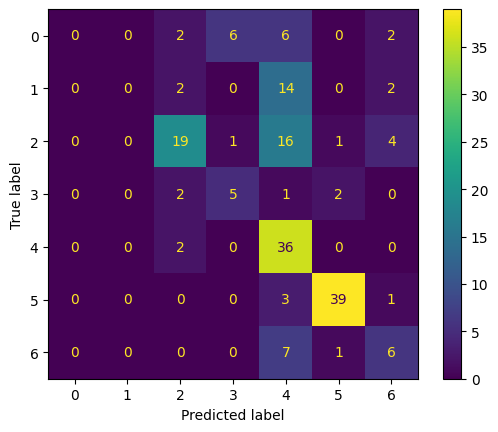

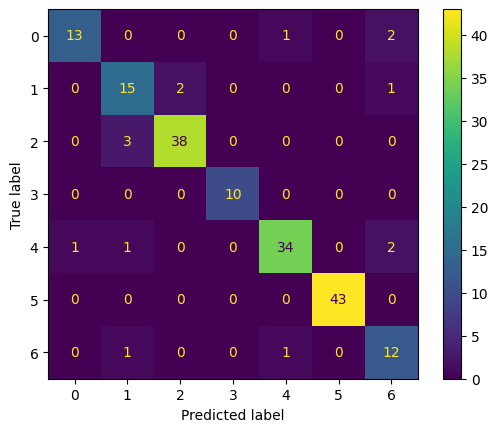

In [247]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matr = confusion_matrix(y_test_encoded, y_pred)  #actual, predicted
conf_matr_scaled = confusion_matrix(y_test_encoded, y_pred_scaled)
conf_matr_disp1 = ConfusionMatrixDisplay(conf_matr).plot()
conf_matr_disp2 = ConfusionMatrixDisplay(conf_matr_scaled).plot()

In [252]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        18
           2       0.70      0.46      0.56        41
           3       0.42      0.50      0.45        10
           4       0.43      0.95      0.60        38
           5       0.91      0.91      0.91        43
           6       0.40      0.43      0.41        14

    accuracy                           0.58       180
   macro avg       0.41      0.46      0.42       180
weighted avg       0.52      0.58      0.53       180



/home/rutpatel/Documents/deeplearning/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rutpatel/Documents/deeplearning/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rutpatel/Documents/deeplearning/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [251]:
print(classification_report(y_test_encoded, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.75      0.83      0.79        18
           2       0.95      0.93      0.94        41
           3       1.00      1.00      1.00        10
           4       0.94      0.89      0.92        38
           5       1.00      1.00      1.00        43
           6       0.71      0.86      0.77        14

    accuracy                           0.92       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.92      0.92      0.92       180

